In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split

In [2]:
dataset = '../model/landmarks_dataset.csv'

In [3]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, 43)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=42)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 50)                2150      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                2040      
                                                                 
 dense_2 (Dense)             (None, 3)                 123       
                                                                 
Total params: 4313 (16.85 KB)
Trainable params: 4313 (16.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
from tensorflow.keras import backend as K
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=[f1_score]
)

In [13]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
)

Epoch 1/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3741 - f1_score: 0.8898 - val_loss: 0.1359 - val_f1_score: 0.8459
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3511 - f1_score: 0.8999 - val_loss: 0.1483 - val_f1_score: 0.8412
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3548 - f1_score: 0.8890 - val_loss: 0.1479 - val_f1_score: 0.8415
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3616 - f1_score: 0.8884 - val_loss: 0.1440 - val_f1_score: 0.8433
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3478 - f1_score: 0.8877 - val_loss: 0.1510 - val_f1_score: 0.8442
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3338 - f1_score: 0.8796 - val_loss: 0.1518 - val_f1_score: 0.8411
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3434 - f1_score: 0.8889 - val_loss: 0.1380 - val_f1_score: 0.8492
Epoch 8/100
1

In [14]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 1ms/step - loss: 0.1463 - f1_score: 0.8328


In [15]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 47ms/step
[0.12245654 0.02936187 0.84818166]
2


14/14 [==============================] - 0s 412us/step


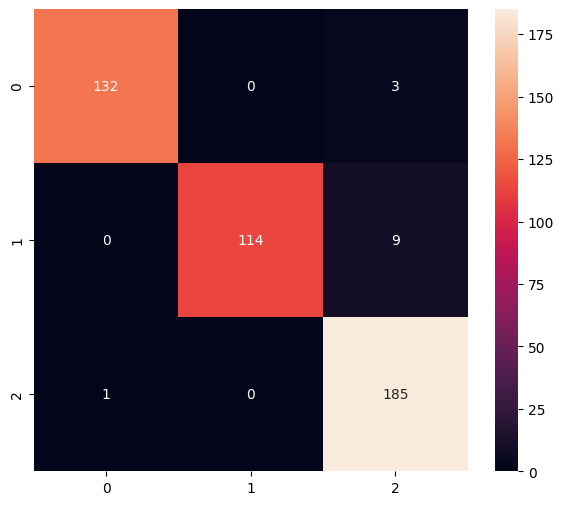

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       135
           1       1.00      0.93      0.96       123
           2       0.94      0.99      0.97       186

    accuracy                           0.97       444
   macro avg       0.98      0.97      0.97       444
weighted avg       0.97      0.97      0.97       444



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

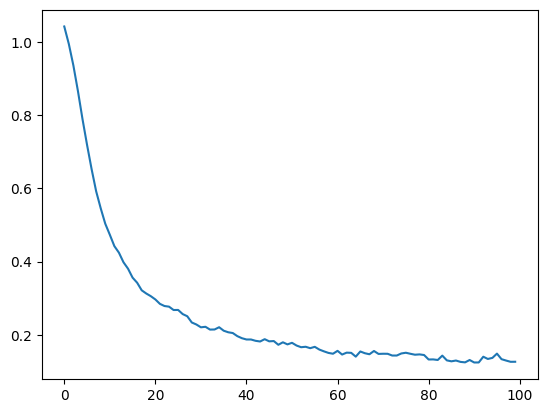

In [ ]:
plt.plot(history.history['val_loss'])